# Weathering-limited erosion isn't limited by weathering alone

Jakob 2013 (in Encyclopedia of Geomorphology, ed. Andrew Goudie): 

  - _a weathering-limited system is one in which the supply of material determines the flux of mass_

### Python preliminaries

In [1]:
import matplotlib as mpl, os, sympy as sy, numpy as np, matplotlib.pyplot as plt
from sympy import Eq
sy.init_printing(pretty_print=True,wrap_line=True)
%config InlineBackend.figure_format = 'retina'
mpl.rc( 'font', size=12)

## Weathering-limited erosion as a moving boundary problem

\begin{equation}
    \dfrac{\partial\eta}{\partial{t}} + \dfrac{\partial{f}}{\partial{t}} 
                                      \dfrac{\partial\eta}{\partial{x}}
    = w_0\, e^{-k(x-f)}
\end{equation}

\begin{equation}
    \dfrac{\partial{f}}{\partial{t}} = v_0\,\eta(f(t))
\end{equation}

Once at steady-state, the front $f(t)$ moves at constant speed $v_s$. By fixing an arbitrary time origin $t=0$ at which steady-state has been achieved, the front position $f_s(t)$ translates linearly with time:

\begin{equation}
    f_s(t) = v_s t
\end{equation}

\begin{equation}
    v_s = \dfrac{\partial{f_s}}{\partial{t}} = v_0\,\eta(f_s(t))
\end{equation}

At steady-state the weathering profile $\eta(x,t)$ reaches a stable form $\eta_s(x-f_s)$ and thus at the front $x=f_s$,

\begin{equation}
    \eta(f_s,t) = \eta_s(0)
\end{equation}

and the steady-state speed of motion of the erosion front is:

\begin{equation}
    v_s = v_0\,\eta_s(0)
\end{equation}

Non-dimensionalizing:

\begin{equation}
\begin{array}{c}
    \tau = w_0 t \\
    \chi = k x \\
    \varphi = k f \,,\,\, \varphi_s = k f_s \\
    \nu_s = \dfrac{v_s}{v_0}
\end{array}
\end{equation}

suggests the following dimensionless "weathering number":

\begin{equation}
    W \equiv \dfrac{w_0}{k v_0}
\end{equation}

which is effectively the ratio of the speed of motion of the weathering front to the speed of erosion of unweathered rock.

\begin{equation}
    W \dfrac{\partial\varphi}{\partial\tau} = \eta(\varphi)
\end{equation}

\begin{equation}
    \dfrac{\partial\eta}{\partial\tau} + \dfrac{\partial\varphi}{\partial\tau} 
                                         \dfrac{\partial\eta}{\partial\chi}
    = e^{-(\chi-\varphi)}
\end{equation}



Forcing erosion front motion to its steady-state speed leads to its dimensionless position $\varphi_s$ to be:

\begin{equation}
    \varphi_s = \frac{\nu_s}{W} \tau
\end{equation}

Substituting, we have the pde:

\begin{equation}
    \dfrac{\partial\eta}{\partial\tau} + \dfrac{\nu_s}{W}\dfrac{\partial\eta}{\partial\chi}
    = \exp\left[-\left(\chi-\dfrac{\nu_s}{W}\tau\right)\right]
\end{equation}

\begin{equation}
    \eta(\chi,0) = \eta_s(\chi)
\end{equation}

Since the steady solution $\eta_s(\chi)$ is time-invariant, we can reduce the PDE in $(\chi,\tau)$ into an ODE in $\chi-\nu_s\tau/W$. 

First the variable change:

\begin{equation}
    \chi_s = \chi - \dfrac{\nu_s}{W}\tau
\end{equation}

\begin{equation}
    \dfrac{\mathrm{d}\eta}{\mathrm{d}\chi_s} 
    = \dfrac{\partial\eta}{\partial\tau}\dfrac{\mathrm{d}\tau}{\mathrm{d}\chi_s} +
     \dfrac{\partial\eta}{\partial\chi}\dfrac{\mathrm{d}\chi}{\mathrm{d}\chi_s}
    = -\dfrac{W}{\nu_s}\dfrac{\partial\eta}{\partial\tau} +
        \dfrac{\partial\eta}{\partial\chi}
\end{equation}

and then by imposing the steady solution $\eta(x-\chi_s,\tau)=\eta_s(\chi_s)$, we get:

\begin{equation}
    \dfrac{\mathrm{d}\eta_s}{\mathrm{d}\chi_s} 
    =  \dfrac{\partial\eta}{\partial\chi}
\end{equation}

and thus:

\begin{equation}
    \dfrac{\mathrm{d}\eta_s}{\mathrm{d}\chi_s} 
    =  -\dfrac{W}{\nu_s} \exp\left(-\chi_s\right)
\end{equation}

Since 

\begin{equation}
    \lim_{\chi_s\rightarrow\infty}\eta_s(\chi_s)=1
\end{equation}

we obtain

\begin{equation}
    \eta_s(\chi_s)
    =  1+\dfrac{W}{\nu_s} \exp\left(-\chi_s\right)
\end{equation}

and so

\begin{equation}
    \eta_s\left(\chi-\chi_s,\tau\right)
    =  1+\dfrac{W}{\nu_s} \exp\left[-\left(\chi-\dfrac{\nu_s}{W}\tau\right)\right]
\end{equation}

Now for the interesting bit: the (dimensionless) steady-state speed of the erosion front is a function only of the weakness at the front, and so:

\begin{equation}
    \nu_s = \eta_s(0) = 1 + \dfrac{W}{\nu_s}
\end{equation}

which rearranges to give

\begin{equation}
    \nu_s^2 - \nu_s - W =0
\end{equation}

and which solves to give

\begin{equation}
    \nu_s = \dfrac{1}{2}\left( 1+\sqrt{1+4W}  \right)
\end{equation}

which in dimensioned form is

\begin{equation}
    v_s =  \dfrac{v_0}{2}\left( 1+\sqrt{1+\dfrac{4w_0}{k v_0}}  \right)
\end{equation}


For so-called weathering-limitation, $W \gg 1/4$:

\begin{equation}
    \lim_{W\rightarrow\infty} \nu_s \approx \sqrt{W}
    \quad\Leftrightarrow\quad
    v_s \approx \sqrt{\frac{w_0 v_0}{k}}
\end{equation}

For so-called erosion-limitation, $W \ll 1/4$:

\begin{equation}
    \lim_{W\rightarrow\infty} \nu_s \approx 1+W
    \quad\Leftrightarrow\quad
    v_s \approx \frac{w_0}{k} + v_0
\end{equation}



## Numerical solution

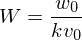

In [2]:
W, w_0, v_0, k = sy.symbols('W w_0 v_0 k', positive=True)
Delta_x, Delta_t = sy.symbols('\\Delta{x} \\Delta{t}', positive=True)

W_eqn = sy.Eq(W, w_0/(k*v_0))
W_eqn

w_0__ = np.float64(5.0)
v_0__ = np.float64(0.3)
k__   = np.float64(1)

x_domain_size = 30.0
t_domain_size = 200
Delta_x__ = 0.01
Delta_t__ = 0.02

n_x_domain = np.int64(x_domain_size/Delta_x__)+1
t_n_steps  = np.int64(t_domain_size/Delta_t__)+1

W_eqn.subs({w_0:w_0__, v_0:v_0__, k:k__})
W__ = np.float64(_.rhs)

In [3]:
H = np.heaviside

def expH(x):
    return np.exp(-x*H(x,0))

def eta_model(tau,chi,W):
    nu_s = 0.5*(1+np.sqrt(1+4*W))
    return (1+(W/nu_s)*np.exp(-(chi)))*H(chi,0)

In [4]:
eta_array = np.zeros((t_n_steps,n_x_domain),dtype=np.float64)
eta_array[0] = np.ones(n_x_domain,dtype=np.float64)
phi_array = np.zeros((t_n_steps),dtype=np.float64)
x_array   = np.linspace(0,x_domain_size,n_x_domain)
t_array   = np.linspace(0,t_domain_size,t_n_steps)
v_array   = np.linspace(0,t_domain_size,t_n_steps)

for j,t_step in enumerate(t_array[:-1]):
    f__ = np.int64(phi_array[j]/Delta_x__)
    fp1__ = f__+1
    fp2__ = f__+2
    if fp2__>=n_x_domain:
        break
    Delta_phi__ = (eta_array[j,f__]/W__)*Delta_t__/2
    v_array[j+1] = Delta_phi__/Delta_t__*2
    phi_array[j+1] = phi_array[j]+Delta_phi__
    eta_array[j+1,f__] = (
          eta_array[j,f__] 
        + (Delta_phi__/Delta_x__)*(eta_array[j,fp1__]-eta_array[j,f__])
        + Delta_t__*expH(x_array[f__]-phi_array[j])
    )
    eta_array[j+1,fp1__:-1] = (
          eta_array[j,fp1__:-1] 
        + (Delta_phi__/Delta_x__)*(eta_array[j,fp2__:]-eta_array[j,fp1__:-1])
        + Delta_t__*expH(x_array[fp1__:-1]-phi_array[j])
    )
    eta_array[j+1,-1] = (
          eta_array[j,-1] 
        + (Delta_phi__/Delta_x__)*(eta_array[j,-1]-eta_array[j,-2])*0.98
        + Delta_t__*expH(x_array[-1]-phi_array[j])
    )
# print('eta =',np.round(eta_array[j+1],3))
# print('f =',np.round(phi_array[:j+2],3))
print('nu_s (numerical)  ≈',np.round(np.mean(v_array[j-10:j+2]),3))
print('nu_s (analytical) =',np.round(0.5*(1+np.sqrt(1+4*W__))/W__,3))

nu_s (numerical)  ≈ 0.278
nu_s (analytical) = 0.277


## Plotting

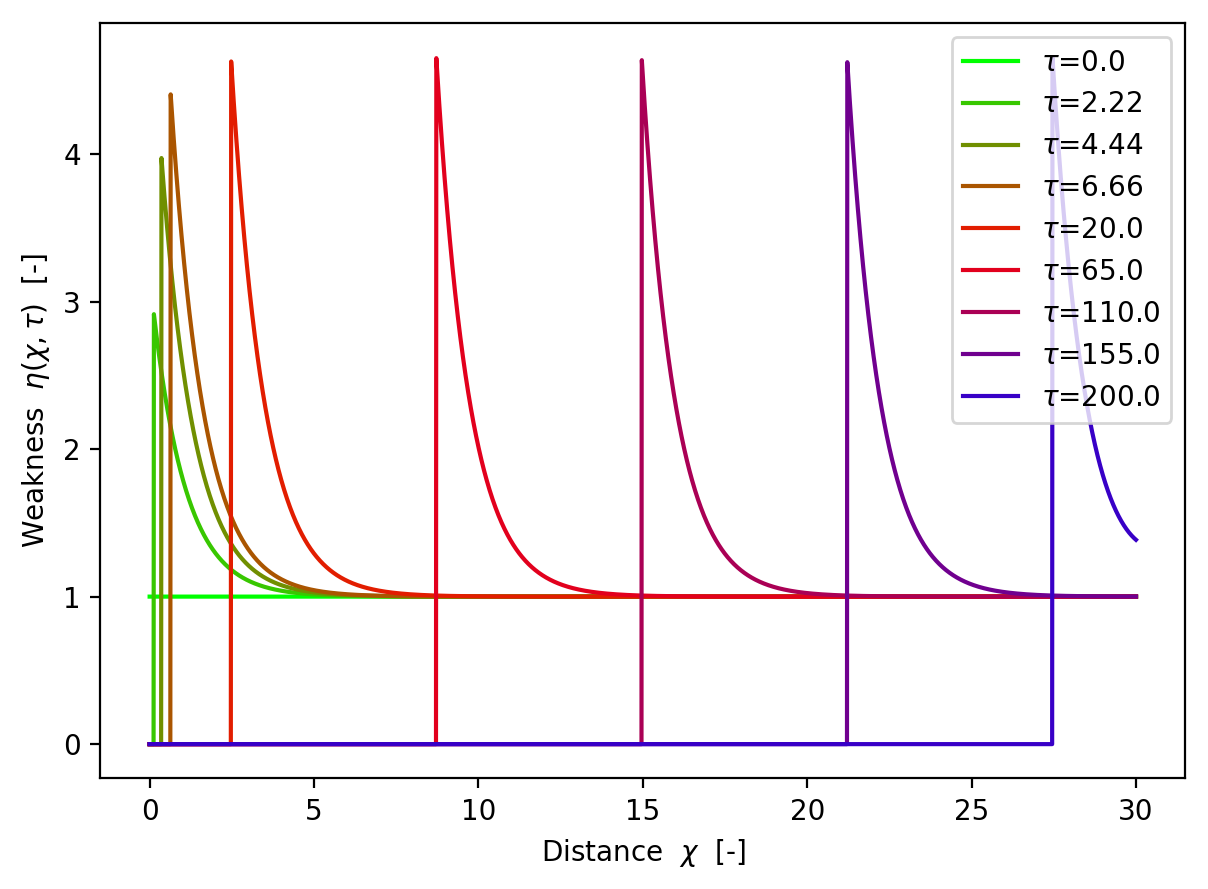

In [5]:
fig_solns = plt.figure()
fig_solns.set_size_inches(7,5)
fig_solns.set_dpi(100)

t_slices1 = np.linspace(0,(t_n_steps-1)//30,num=4,endpoint=True,dtype=np.int64)
t_slices2 = np.linspace((t_n_steps-1)//10,j+1,num=5,endpoint=True,dtype=np.int64)
t_slices = np.concatenate((t_slices1,t_slices2))
cmap = plt.cm.brg.reversed()
for idx,t_slice in enumerate(t_slices):
    plt.plot(x_array,eta_array[t_slice],color=cmap(idx/t_slices.size),
             label='$\\tau$={}'.format(t_array[t_slice]))
plt.legend(loc='upper right')
plt.xlabel('Distance  $\chi$  [-]');
plt.ylabel('Weakness  $\eta(\chi,\\tau)$  [-]');

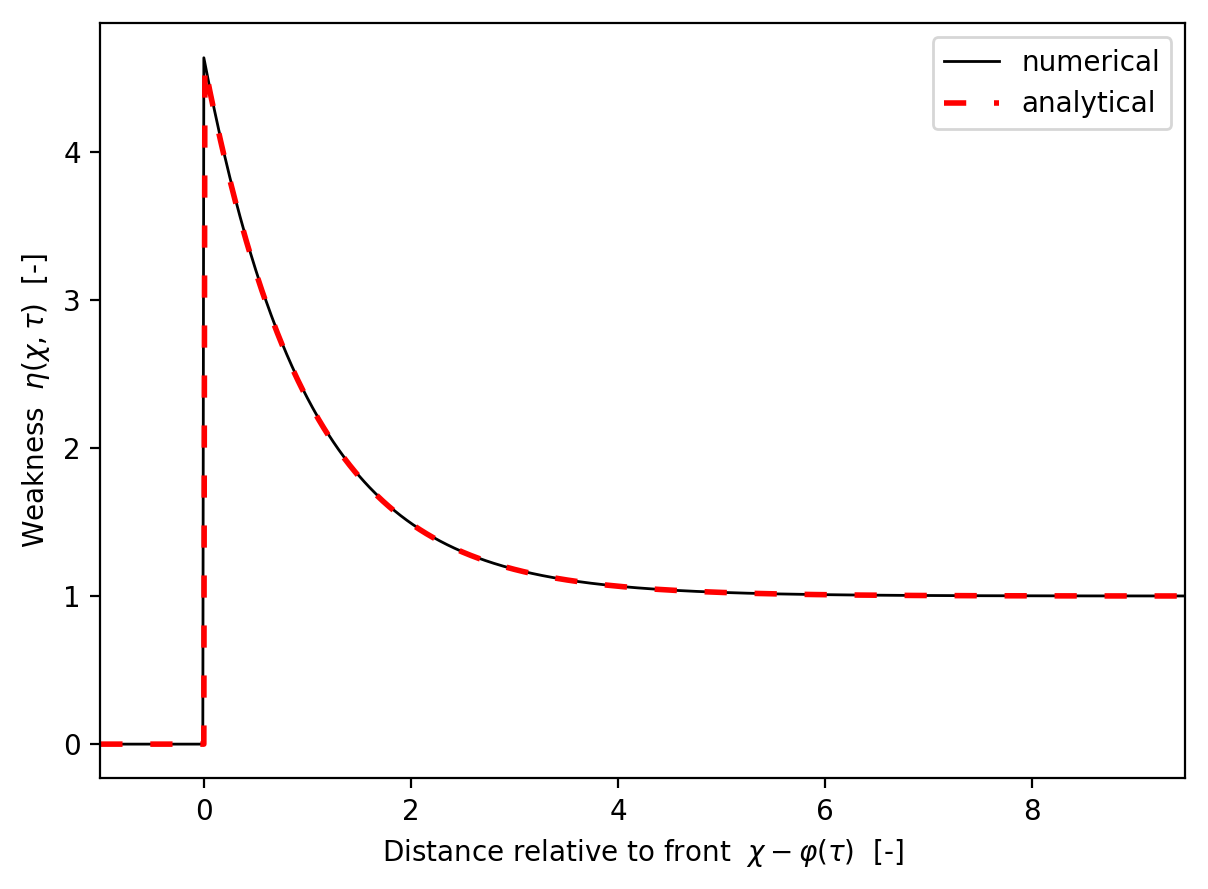

In [6]:
j__ = (j*3)//4
i_offset = n_x_domain//30
phi__ = phi_array[j__]
phi0__ = int(phi__/Delta_x__)-i_offset
y__ = x_array[phi0__:]-x_array[phi0__+i_offset]
tau__ = t_array[-1]

# print('eta_0 =',np.max(eta_array[j__,:]))
eta_numerical = eta_array[j__,phi0__:]
eta_analytical = eta_model(tau__,y__,W__)

fig_ss = plt.figure()
fig_ss.set_size_inches(7,5)
fig_ss.set_dpi(100)

plt.plot(y__,eta_numerical, c='k', lw=1, label='numerical');
plt.plot(y__,eta_analytical, c='r', ls=(0, (4, 5)), lw=2, label='analytical'  );
# plt.plot(y__,eta_numerical/eta_analytical , label='numerical/analytical'  );
plt.autoscale(enable=True, tight=True, axis='x')
plt.legend()
plt.xlabel('Distance relative to front  $\chi-\\varphi(\\tau)$  [-]');
plt.ylabel('Weakness  $\eta(\chi,\\tau)$  [-]');

## Export

In [7]:
import sys
results_dir = os.path.join('.','ErosionWeatheringResults')
try:
    if not os.path.exists(results_dir):
        os.mkdir(results_dir)
except:  
    raise
try:
    fig_solns.savefig(os.path.join(results_dir,'eroding_weakness_solns.pdf'))
    fig_ss.savefig(os.path.join(results_dir,'eroding_weakness_ss.pdf'))
except OSError:  
    print('Failed to save figures as PDFs')
    raise
except:
    raise